<a href="https://colab.research.google.com/github/GammaKing2000/ML-IronMan-Thanos/blob/master/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize


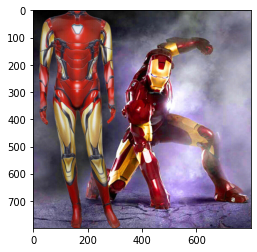

In [28]:
img = plt.imread('/content/drive/MyDrive/Images2/Iron Man/$_10.jfif')
plt.imshow(img)

In [29]:
import os
import numpy as np
datadir = '/content/drive/MyDrive/Images2'
categories = ['Iron Man', 'Thanos']
target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir, i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array, (150,150,3))
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)
flat_data = np.array(flat_data)
target = np.array(target)



In [30]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.shape

(186, 67501)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, target,test_size=0.3,random_state=30)


In [32]:
np.unique(y_test, return_counts=True)
from sklearn.svm import SVC

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
from sklearn.model_selection import GridSearchCV
model = SVC()
param={
    'kernel':['linear', 'poly', 'rbf'],
    'C':[0.1,1,10,100]
}
grid = GridSearchCV(model,param,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [35]:

model = SVC(C=10)
model.fit(x_train,y_train)


SVC(C=10)

In [36]:
y_pred = model.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
accuracy_score(y_pred,y_test)

0.8214285714285714

In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Iron Man       0.78      0.84      0.81        25
      Thanos       0.86      0.81      0.83        31

    accuracy                           0.82        56
   macro avg       0.82      0.82      0.82        56
weighted avg       0.82      0.82      0.82        56



In [40]:
confusion_matrix(y_pred,y_test)

array([[21,  4],
       [ 6, 25]])

In [42]:
import pickle
pickle.dump(model,open('img_model.p','wb'))

In [43]:
final_model = pickle.load(open('img_model.p','rb'))


Enter your URL: https://www.denofgeek.com/wp-content/uploads/2019/02/mcu-1-iron-man.jpg?resize=768%2C432
(432, 768, 3)
Predicted Output: ['Iron Man']


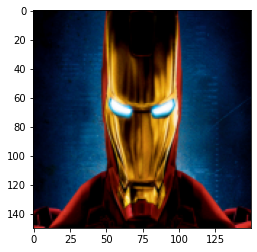

In [44]:
#test run
flat_data2 = []
url = input('Enter your URL: ')
img2 = imread(url)
img_resized = resize(img2, (150,150,3))
flat_data2.append(img_resized.flatten())
flat_data2 = np.array(flat_data2)
print(img2.shape)
plt.imshow(img_resized)
y_out = final_model.predict(flat_data2)
print(f'Predicted Output: {y_out}')
#ironman test link - https://www.denofgeek.com/wp-content/uploads/2019/02/mcu-1-iron-man.jpg?resize=768%2C432
#thanos test link - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKB2KQrQ8EcmjX4Eu2U6heo1vt1LJoth6_Yw&usqp=CAU


In [ ]:
%%writefile MinorProject.py
from skimage.io import imread
from skimage.transform import resize
import streamlit as st
import numpy as np
import joblib
model = joblib.load('img_recog_model')
st.title('Infinity War Recognizer')
ip = st.text_input('Enter image URL')
flat_data = []
img1 = imread(ip)
img1_resized = resize(img1,(150,150,3))
flat_data.append(img1_resized.flatten())
flat_data = np.array(flat_data)
op = model.predict(flat_data)
if st.button('Predict'):
  st.title(op[0]) 

Writing MinorProject.py


In [ ]:
!pip install pipreqs
!pipreqs /content

INFO: Successfully saved requirements file in /content/requirements.txt


In [ ]:
class Personel_transformer():
  def transform(img1):
    flat_data1 = []
    img1_resized = resize(img1,(150,150,3))
    flat_data1.append(img1_resized.flatten())
    flat_data1 = np.array(flat_data1)
    return flat_data1


In [45]:
from sklearn.pipeline import Pipeline

img_model = Pipeline([('Scaler',MinMaxScaler()),('model', SVC(C=10))])

In [46]:
img_model.fit(x_train,y_train)

Pipeline(steps=[('Scaler', MinMaxScaler()), ('model', SVC(C=10))])

array(['Iron Man'], dtype='<U8')

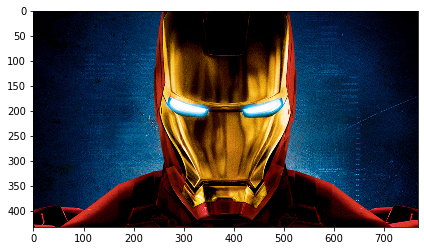

In [47]:
trail = 'https://www.denofgeek.com/wp-content/uploads/2019/02/mcu-1-iron-man.jpg?resize=768%2C432'
flat_data1 = []
img1 = imread(trail)
img1_resized = resize(img1, (150,150,3))
flat_data1.append(img1_resized.flatten())
flat_data1 = np.array(flat_data1)
imshow(trail)


img_model.predict(flat_data1)

In [ ]:
import joblib
joblib.dump(img_model,'img_recog_model')

['img_recog_model']

In [ ]:
!pip install pipreqs
!pipreqs /content

In [ ]:
!pipreqs /content --force

INFO: Successfully saved requirements file in /content/requirements.txt


In [ ]:
!pip install scikit-learn==0.23.2

     |████████████████████████████████| 6.8MB 12.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
